**Using Scikit Learn to perform Logistic Regression for Classification**

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
# Skip this library for not going to use auto Train & Test data split.
# from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

In [2]:
# Load csv data to Pandas dataframe and display the header.
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

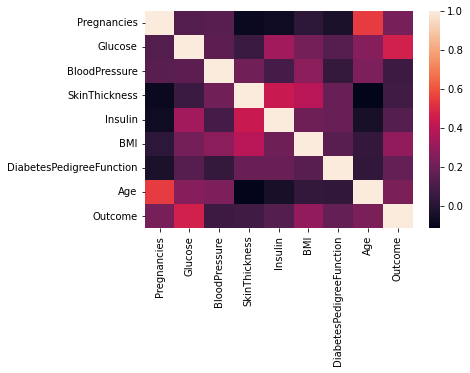

In [4]:
# Use the SNS library to observe the correlation of features.
corr = df.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [5]:
# Manual Train & Test data split for model training and reserve 18 records for Check purposes.
dfTrain = df[:650]
dfTest = df[650:750]
dfCheck = df[750:]

In [6]:
# Prepare the Features datasets and corresponding Label datasets for model training.
y_train = np.asarray(dfTrain['Outcome'])
X_train = np.asarray(dfTrain.drop(columns='Outcome'))
y_test = np.asarray(dfTest['Outcome'])
X_test = np.asarray(dfTest.drop(columns='Outcome'))

In [7]:
# Skip this step for auto Train & Test data split.
# dfTrain = df[:750]
# dfCheck = df[750:]
# Prepare the Features datasets and corresponding Label datasets.
# X = dfTrain.drop(['Outcome'],axis=1)
# y = dfTrain.Outcome
# Perform Train & Test data split automatically.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [8]:
# Perform normalization to feature input datasets.
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
 
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [9]:
# Perform model training by Logistic Regression with Scikit Learn library.
skl_model = LogisticRegression()
skl_model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Check the model accuracy in a simple way.
accuracy = skl_model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


In [10]:
# Check the model performance report by classification_report from sklearn.metrics function.
y_pred = skl_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        63
           1       0.74      0.62      0.68        37

    accuracy                           0.78       100
   macro avg       0.77      0.75      0.75       100
weighted avg       0.78      0.78      0.78       100



Text(0.5, 0, 'Importance')

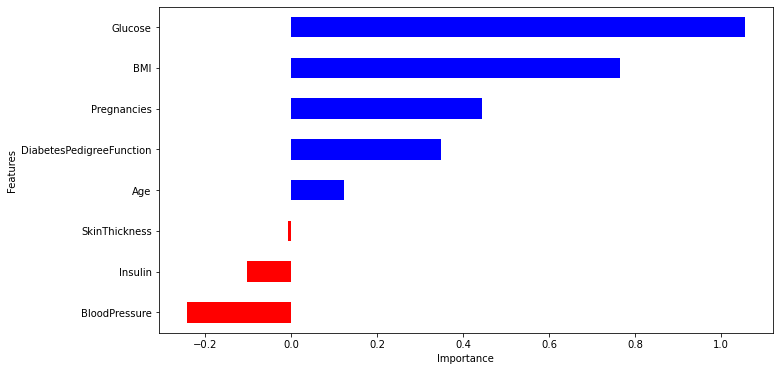

In [12]:
# Display features' importance of the model.
coeff = list(skl_model.coef_[0])
labels = list(dfTrain.drop(columns='Outcome').columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [13]:
# Save trained model by JobLib library.
joblib.dump([skl_model, means, stds], './models/SKLdiabetesPredictionModel.pkl')

['./models/SKLdiabetesPredictionModel.pkl']

In [14]:
# Reload the saved model and check the accuracy for cross-checking.
ReloadedSKLDiabetesPredictionModel, means, stds = joblib.load('./models/SKLdiabetesPredictionModel.pkl')
accuracyModel = ReloadedSKLDiabetesPredictionModel.score(X_test, y_test)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [15]:
# Display header of Check dataset.
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [16]:
# Perform essential preparation of input dataset.
dfCheck = dfCheck.drop(['Outcome'],axis=1)
dfCheckResult = dfCheck.copy()
sampleCheckDataFeatures = dfCheck[:18]
# Perform normalization for the input dataset.
sampleCheckDataFeatures = (sampleCheckDataFeatures - means)/stds
# Perform prediction with a trained model.
dfCheckResult['Outcome'] = ReloadedSKLDiabetesPredictionModel.predict(sampleCheckDataFeatures)
predictionProbability = ReloadedSKLDiabetesPredictionModel.predict_proba(sampleCheckDataFeatures)
probaList = []
for proba in predictionProbability:
    probaList.append(max(proba))
dfCheckResult['proba'] = probaList

In [17]:
# Minor adjustment to covert probability "proba" column value from the float into a read-able percentage.
dfCheckResult['proba'] = dfCheckResult['proba'].astype(float).map("{:.2%}".format)

In [18]:
# Display the prediction result, Outcome and corresponding Probability.
dfCheckResult[['Outcome', 'proba']]

,Outcome,proba
750,1,55.92%
751,0,72.24%
752,0,89.84%
753,1,67.04%
754,1,69.86%
755,0,55.28%
756,0,53.84%
757,0,70.67%
758,0,82.81%
759,1,87.47%
